In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pyqpanda as pq
import pyvqnet as pv
import random
%matplotlib inline

In [2]:
from utils import *
from PIL import Image, ImageEnhance
import numpy as np
import random

In [3]:
d = Dataset(
    "data/cifar-10-batches-py/data_batch_1",
    "data/cifar-10-batches-py/data_batch_2",
    "data/cifar-10-batches-py/data_batch_3",
    "data/cifar-10-batches-py/data_batch_4",
    "data/cifar-10-batches-py/data_batch_5",
)

In [7]:
d.showimg(645);

In [116]:
obs_list = [
    {
        "wires": [i],
        "observables": ["Z"],
        "coefficient": [1],
    }
    for i in range(10)
]


def pqc(input, param, qubits, cbits, machine):
    n = len(input)
    prog = pq.QProg()
    prog.insert(pq.H(qubits[10]))
    for i in range(10):
        prog.insert(pq.CNOT(qubits[10], qubits[i]))
    for i in range(n):
        prog.insert(pq.U2(qubits[i % 10], param[i], input[i]))
    for i in range(10):
        prog.insert(pq.CNOT(qubits[10], qubits[i]))

    re = pv.qnn.measure.MeasurePauliSum(machine, prog, obs_list, qubits)
    return re


class Model(pv.nn.module.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = pv.nn.Conv2D(3, 30, (3, 3))
        self.conv2 = pv.nn.Conv2D(30, 30, (3, 3))
        self.pool2 = pv.nn.MaxPool2D((2, 2), (2, 2))
        self.conv3 = pv.nn.Conv2D(30, 30, (3, 3))
        self.conv4 = pv.nn.Conv2D(30, 30, (3, 3))
        self.pool4 = pv.nn.MaxPool2D((2, 2), (2, 2))
        self.conv5 = pv.nn.Conv2D(30, 30, (3, 3))
        self.conv6 = pv.nn.Conv2D(30, 30, (3, 3))
        # self.qc = pv.qnn.quantumlayer.QuantumLayer(
        #     pqc, 30, "CPU", 11, diff_method="finite_diff"
        # )
        self.qc = pv.nn.Linear(30, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = pv.tensor.flatten(x, 1)
        x = 2 * pv.tensor.atan(x)
        x = self.qc(x)
        return x

In [19]:
obs_list = [
    {
        "wires": [i],
        "observables": ["Z"],
        "coefficient": [1],
    }
    for i in range(10)
]


def pqc(input, param, qubits, cbits, machine):
    n = len(input)
    prog = pq.QProg()
    prog.insert(pq.H(qubits[10]))
    for i in range(10):
        prog.insert(pq.CNOT(qubits[10], qubits[i]))
    for i in range(n):
        prog.insert(pq.U2(qubits[i % 10], param[i], input[i]))
    for i in range(10):
        prog.insert(pq.CNOT(qubits[10], qubits[i]))

    re = pv.qnn.measure.MeasurePauliSum(machine, prog, obs_list, qubits)
    return re


class Model(pv.nn.module.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv = pv.nn.Conv2D(3, 30, (32, 32))
        self.qc = pv.qnn.quantumlayer.QuantumLayer(
            pqc, 30, "CPU", 11, diff_method="finite_diff"
        )
        # self.qc = pv.nn.Linear(30, 10)

    def forward(self, x):
        x = self.conv(x)
        x = pv.tensor.flatten(x, 1)
        x = 2 * pv.tensor.atan(x)
        x = self.qc(x)
        return x

In [902]:
class Model(pv.nn.module.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv = pv.nn.Conv2D(3, 30, (32, 32))
        self.qc = pv.nn.Linear(30, 10)

    def forward(self, x):
        x = self.conv(x)
        x = pv.tensor.flatten(x, 1)
        x = self.qc(x)
        return x

In [856]:
obs_list = [
    {
        "wires": [i],
        "observables": ["Z"],
        "coefficient": [1],
    }
    for i in range(10)
]


def pqc(input, param, qubits, cbits, machine):
    n = len(input)
    prog = pq.QProg()
    prog.insert(pq.H(qubits[10]))
    for i in range(10):
        prog.insert(pq.CNOT(qubits[10], qubits[i]))
    for i in range(10):
        prog.insert(
            pq.U3(
                qubits[i],
                np.arctan(param[i]),
                np.arctan(param[i + 10]),
                np.arctan(param[i + 20]),
            )
        )
        prog.insert(
            pq.U3(
                qubits[i],
                np.arctan(input[i]),
                np.arctan(input[i + 10]),
                np.arctan(input[i + 20]),
            )
        )
        prog.insert(
            pq.U3(
                qubits[i],
                np.arctan(param[i + 30]),
                np.arctan(param[i + 40]),
                np.arctan(param[i + 50]),
            )
        )
    for i in range(9, -1, -1):
        prog.insert(pq.CNOT(qubits[10], qubits[i]))
    prog.insert(pq.H(qubits[10]))

    re = pv.qnn.measure.MeasurePauliSum(machine, prog, obs_list, qubits)
    return re


class Model(pv.nn.module.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv = pv.nn.Conv2D(3, 30, (32, 32))
        self.qc = pv.qnn.quantumlayer.QuantumLayer(
            pqc, 60, "CPU", 11, diff_method="finite_diff"
        )
        # self.qc = pv.nn.Linear(30, 10)

    def forward(self, x):
        x = self.conv(x)
        x = pv.tensor.flatten(x, 1)
        x = self.qc(x)
        return x

In [616]:
obs_list = [
    {
        "wires": [i],
        "observables": ["Z"],
        "coefficient": [1],
    }
    for i in range(10)
]


def pqc(input, param, qubits, cbits, machine):
    n = len(input)
    prog = pq.QProg()
    prog.insert(pq.H(qubits[10]))
    for i in range(10):
        prog.insert(pq.CNOT(qubits[10], qubits[i]))
    for i in range(10):
        prog.insert(pq.RX(qubits[i], np.arctan(input[i])))
        prog.insert(pq.RY(qubits[i], np.arctan(input[i + 10])))
        prog.insert(pq.RZ(qubits[i], np.arctan(input[i + 20])))
        prog.insert(pq.RX(qubits[i], np.arctan(param[i])))
        prog.insert(pq.RY(qubits[i], np.arctan(param[i + 10])))
        prog.insert(pq.RZ(qubits[i], np.arctan(param[i + 20])))
    for i in range(9, -1, -1):
        prog.insert(pq.CNOT(qubits[10], qubits[i]))
    prog.insert(pq.H(qubits[10]))

    re = pv.qnn.measure.MeasurePauliSum(machine, prog, obs_list, qubits)
    return re


class Model(pv.nn.module.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = pv.nn.Conv2D(3, 30, (3, 3))
        self.conv2 = pv.nn.Conv2D(30, 30, (3, 3))
        self.pool2 = pv.nn.MaxPool2D((2, 2), (2, 2))
        self.conv3 = pv.nn.Conv2D(30, 30, (3, 3))
        self.conv4 = pv.nn.Conv2D(30, 30, (3, 3))
        self.pool4 = pv.nn.MaxPool2D((2, 2), (2, 2))
        self.conv5 = pv.nn.Conv2D(30, 30, (5, 5))
        self.qc = pv.qnn.quantumlayer.QuantumLayer(
            pqc, 30, "CPU", 11, diff_method="finite_diff"
        )
        # self.qc = pv.nn.Linear(30, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool4(x)
        x = self.conv5(x)
        x = pv.tensor.flatten(x, 1)
        x = self.qc(x)
        return x

In [124]:
m = Model()
print(sum(p.numel() for p in m.parameters()))
# print(m.parameters())
x = np.random.rand(32, 3, 32, 32).astype("float32")
y_pred = m(x)
print(y_pred[:2])
y = np.random.randint(0, 10, (32,), dtype="int64")
print(y)
print(y_pred.argmax(1, False).to_numpy())

41800
[[ 0.0715334, 0.1884509, 0.0387493,-0.0371967, 0.1511531,-0.1249754,
   0.131247 ,-0.0982674, 0.0822935,-0.0017775],
 [ 0.0567853, 0.1982534, 0.0429443,-0.006319 , 0.1434529,-0.146507 ,
   0.1272477,-0.0926824, 0.0715861, 0.0205004]]
[0 8 8 4 8 9 0 2 9 8 7 0 7 9 9 1 7 7 9 8 2 1 8 0 5 3 1 3 9 9 3 6]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [603]:
los = pv.nn.loss.CrossEntropyLoss()
opt = pv.optim.SGD(m.parameters())
y_pred = m(x)
loss = los(y, y_pred)
print(loss.item())
loss.backward()
opt._step()
y_pred = m(x)
loss = los(y, y_pred)
print(loss.item())

2.2426698207855225
2.240192413330078


In [125]:
for i in range(1, 101):
    print(f"epoch {i} \t loss ", end="")
    los = pv.nn.loss.CrossEntropyLoss()
    opt = pv.optim.SGD(m.parameters())
    y_pred = m(x)
    loss = los(y, y_pred)
    print(loss.item())
    y_p = y_pred.argmax(1, False).to_numpy()
    s = sum(y_p == y)
    print(y)
    print(y_p)
    print(f"correct: {s}")
    print()
    if s == y.shape[0]:
        print("done")
        break
    loss.backward()
    opt._step()

epoch 1 	 loss 2.3100802898406982
[0 8 8 4 8 9 0 2 9 8 7 0 7 9 9 1 7 7 9 8 2 1 8 0 5 3 1 3 9 9 3 6]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
correct: 3

epoch 2 	 loss 2.3045542240142822
[0 8 8 4 8 9 0 2 9 8 7 0 7 9 9 1 7 7 9 8 2 1 8 0 5 3 1 3 9 9 3 6]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
correct: 3

epoch 3 	 loss 2.2939271926879883
[0 8 8 4 8 9 0 2 9 8 7 0 7 9 9 1 7 7 9 8 2 1 8 0 5 3 1 3 9 9 3 6]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
correct: 3

epoch 4 	 loss 2.278923749923706
[0 8 8 4 8 9 0 2 9 8 7 0 7 9 9 1 7 7 9 8 2 1 8 0 5 3 1 3 9 9 3 6]
[8 1 1 8 8 8 1 1 8 8 1 8 8 8 8 1 8 8 1 1 8 8 8 8 8 9 8 8 1 8 8 8]
correct: 4

epoch 5 	 loss 2.2604002952575684
[0 8 8 4 8 9 0 2 9 8 7 0 7 9 9 1 7 7 9 8 2 1 8 0 5 3 1 3 9 9 3 6]
[9 9 9 9 9 8 9 9 9 9 9 9 8 9 9 9 9 9 9 9 8 9 9 9 9 9 9 9 9 9 9 9]
correct: 6

epoch 6 	 loss 2.2392382621765137
[0 8 8 4 8 9 0 2 9 8 7 0 7 9 9 1 7 7 9 8 2 1 8 0 5 3 1 3 9 9 3 6]
[9 9 9 9 9 

In [ ]:
print(y)
print(y_pred.argmax(1, False).to_numpy())

In [ ]:
print(y_pred)

In [568]:
for i in range(30):
    m.parameters()[1][i] = 0

In [ ]:
m.parameters()[1]

In [6]:
513*32+33*16+16*10

17104

In [6]:
17424/16

1089.0

In [7]:
33*33

1089

In [8]:
from pyvqnet.tensor import tensor
from pyvqnet.qnn.qcnn.qconv import QConv
x = tensor.ones([16,3,32,32])
layer = QConv(input_channels=3, output_channels=1, quantum_number=4, stride=(1, 1))
y = layer(x)
print(y)

[[[[0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   ...,
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945]]],


 [[[0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   ...,
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945]]],


 [[[0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.7184945],
   [0.7184945,0.7184945,0.7184945,...,0.7184945,0.7184945,0.718494

In [9]:
y.backward()

KeyboardInterrupt: 

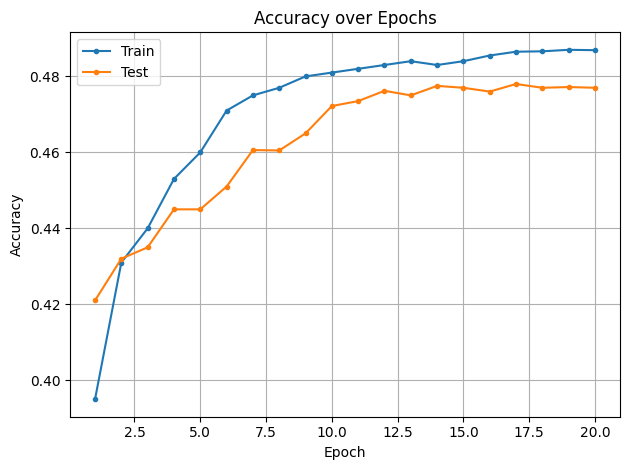

In [34]:

acc_train=[0.395,0.431,0.44,0.453,0.460,0.471,0.475,0.477,0.480,0.481,0.482,0.483,0.484,0.483,0.484,0.4855,0.4865,0.4866,0.4870,0.4869]
acc_test=[0.421,0.432,0.435,0.445,0.445,0.451,0.4606,0.4605,0.465,0.4722,0.4735,0.4762,0.475,0.4775,0.477,0.476,0.478,0.477,0.4772,0.4770]
epochs=range(1,len(acc_train)+1)



plt.plot(epochs, acc_train, label="Train", marker=".")
plt.plot(epochs, acc_test, label="Test", marker=".")

plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
# plt.ylim((0,1))
plt.tight_layout()

plt.savefig("train161.png")
plt.show()